In [64]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [65]:
# cdf plotting을 하기 위한 function.
def draw_cdf(np_result, n_bins, label, title, color):
    np_result = np.array(np_result, dtype=float)
    filename = title + '.png'

    plt.rcParams["figure.figsize"] = [15, 10]
    plt.rcParams["figure.autolayout"] = True

    count, bins_count = np.histogram(np_result, bins=n_bins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF", color=color)
    plt.xlabel(label, fontsize=12)
    plt.title(title, fontsize=18)
    plt.xscale('symlog')
    plt.savefig(filename, dpi=300)
    plt.show()

In [66]:
def select_query_result_to_df(sql):
    connection = cn.make_connection('connection.csv')
    cursor = connection.cursor(pymysql.cursors.DictCursor)
    cursor.execute(sql)
    result = cursor.fetchall()
    connection.close()
    
    result_df = pd.DataFrame(result)
    
    return result_df

In [67]:
sql = 'select * from mentor where is_valid = 1;'
result_df = select_query_result_to_df(sql)
result_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,None,None
1,______________Blank,2,1,2.00000,1.50000,0.15693655,-2.00000000,1,0E-8,0.63092975,None,None
2,_________-----------,4,1,2.00000,1.00000,0.14682996,-2.00000000,1,0.63092975,0E-8,None,None
3,_________ez_________,1,1,1.00000,2.00000,None,None,1,0E-8,0E-8,None,None
4,_______Anon______,1,1,1.00000,2.00000,None,None,1,0E-8,0E-8,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
594992,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,None,None,None,None
594993,zzzzzzarah,1,1,1.00000,3.00000,None,None,1,None,None,None,None
594994,zzzzzzz____,3,3,1.00000,2.00000,0.21963021,0E-8,1,None,None,None,None
594995,zzzzzzzzzra,1,1,1.00000,3.00000,None,None,1,None,None,None,None


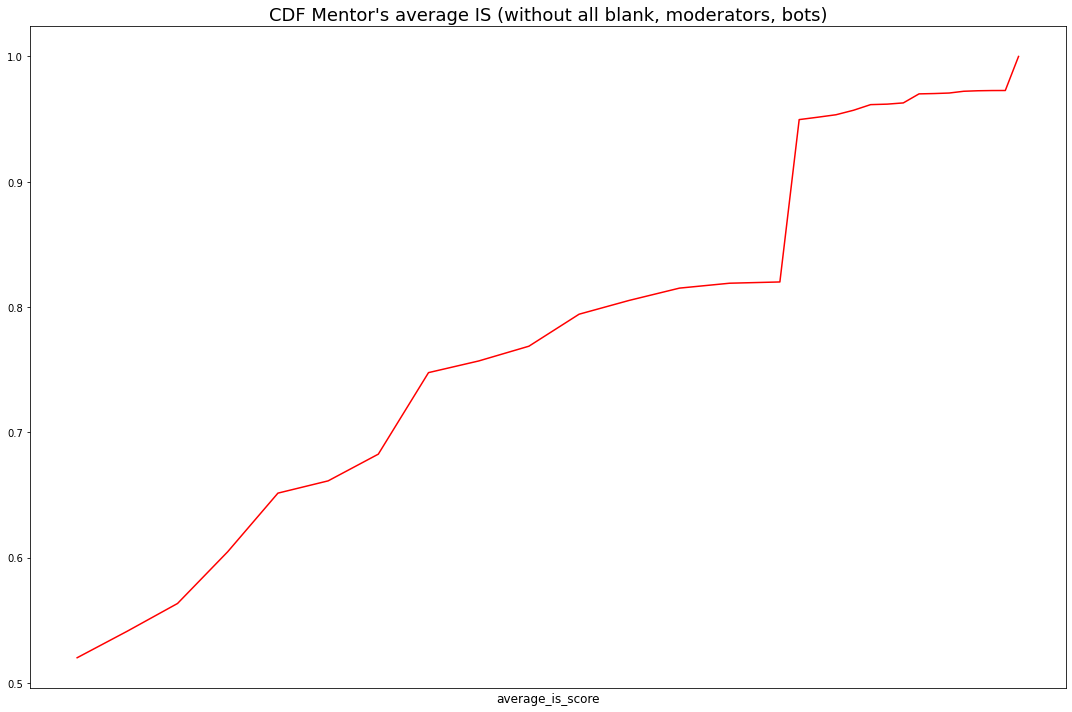

In [68]:
np_result1 = np.array(result_df['average_is_score'].tolist())
draw_cdf(np_result1, 30, 'average_is_score', "CDF Mentor's average IS (without all blank, moderators, bots)", 'red')

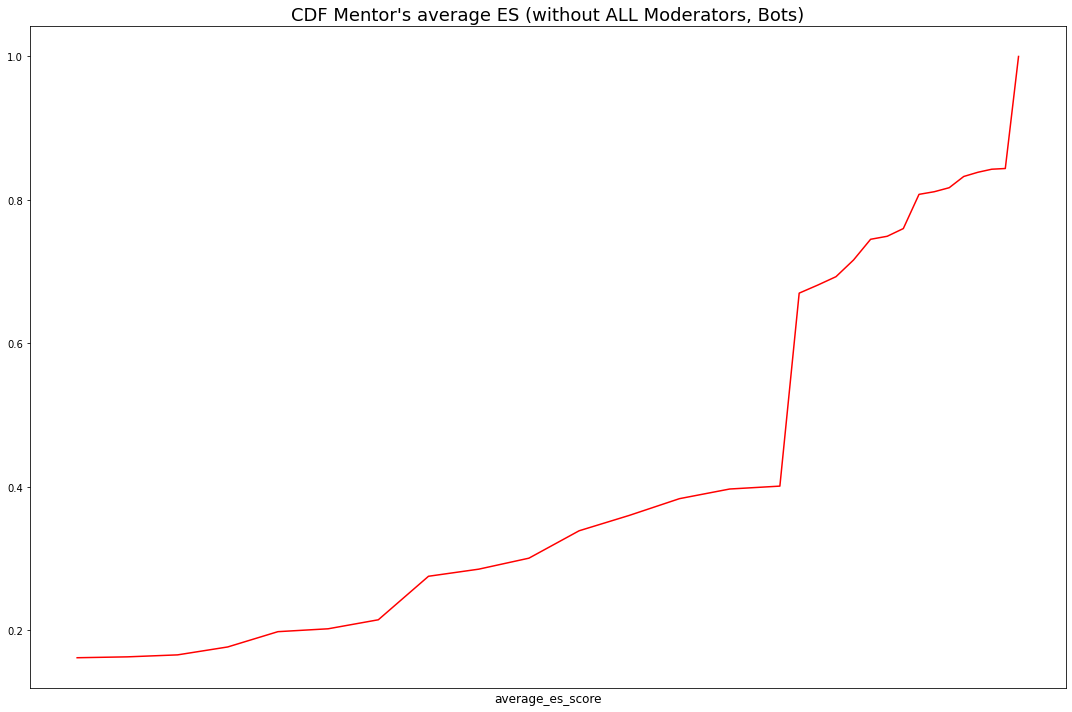

In [69]:
np_result2 = np.array(result_df['average_es_score'].tolist())
draw_cdf(np_result2, 30, 'average_es_score', "CDF Mentor's average ES (without ALL Moderators, Bots)", 'red')

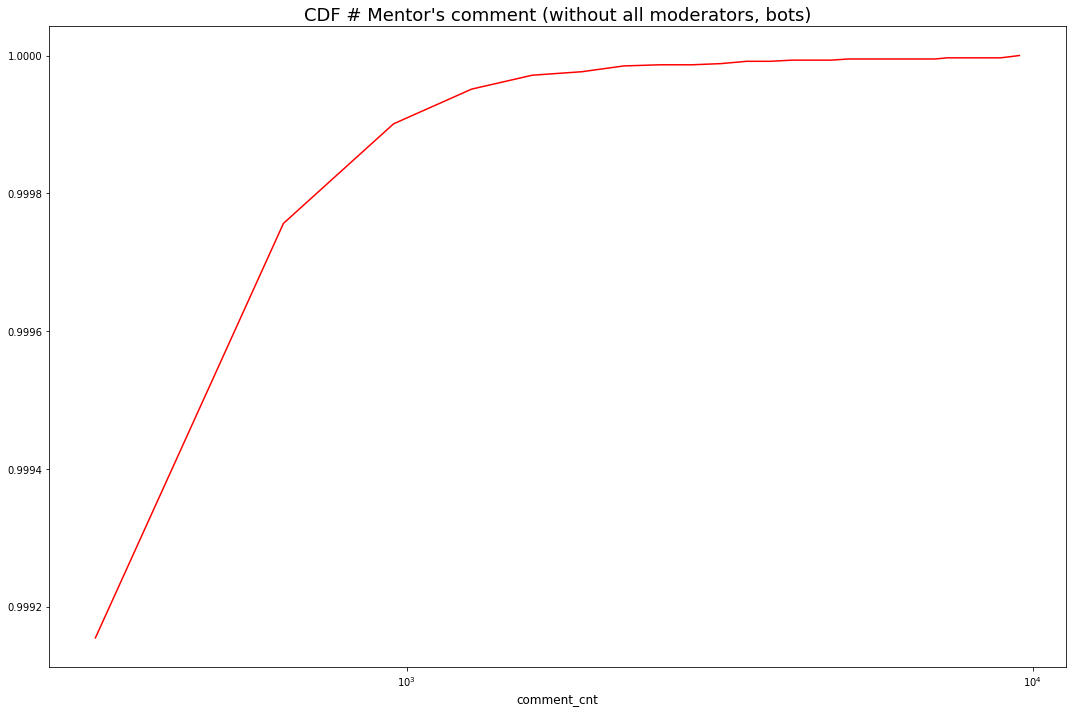

In [70]:
np_result3 = np.array(result_df['comment_cnt'].tolist())
draw_cdf(np_result3, 30, 'comment_cnt', "CDF # Mentor\'s comment (without all moderators, bots)", 'red')

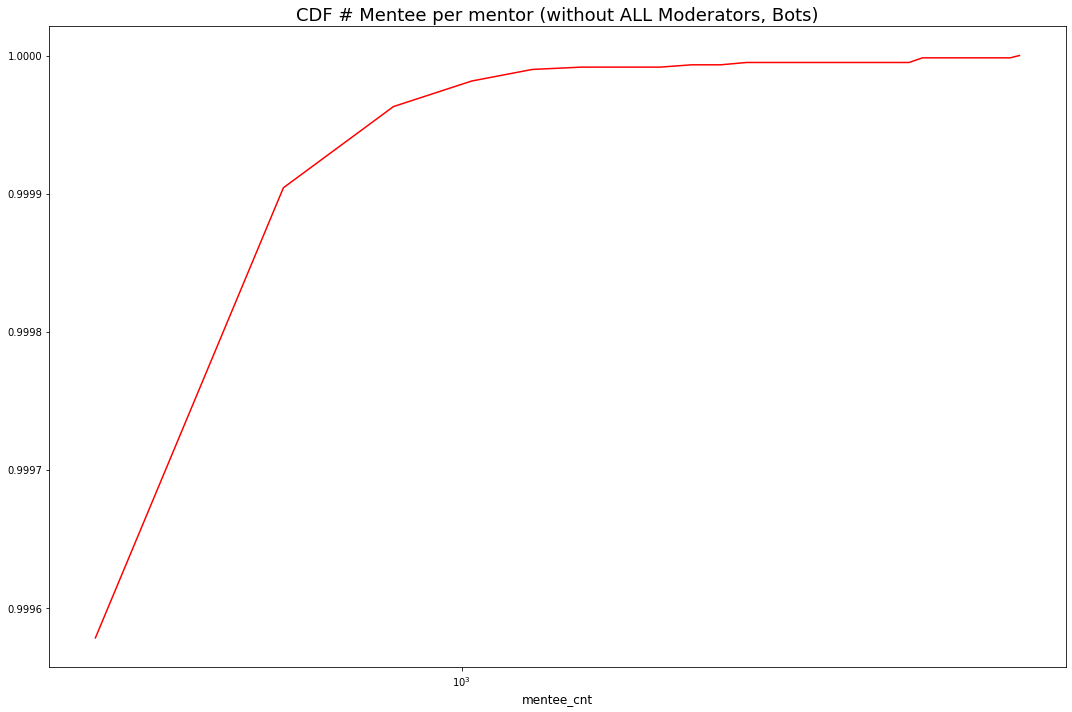

In [71]:
np_result4 = np.array(result_df['mentee_cnt'].tolist())
draw_cdf(np_result4, 30, 'mentee_cnt', "CDF # Mentee per mentor (without ALL Moderators, Bots)", 'red')

In [72]:
sql2 = 'select * from mentor where is_valid = 1 and comments_similarity >= 0;'
result_df2 = select_query_result_to_df(sql2)
result_df2

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,None,None
1,______________Blank,2,1,2.00000,1.50000,0.15693655,-2.00000000,1,0E-8,0.63092975,None,None
2,_________-----------,4,1,2.00000,1.00000,0.14682996,-2.00000000,1,0.63092975,0E-8,None,None
3,_______woohoo,4,2,1.00000,2.00000,0.02432665,0.05403434,1,0E-8,0.94639463,None,None
4,_______ZERO,10,10,1.10000,2.20000,0.09195855,0.05160771,1,0.29590327,0.81734542,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
348329,ZzzZura,2,1,1.00000,1.50000,0.12417232,0E-8,1,None,None,None,None
348330,Zzzzz315,2,2,1.00000,2.50000,0.18895569,0E-8,1,None,None,None,None
348331,zzzzzima,2,2,2.00000,2.00000,0.13160075,0E-8,1,None,None,None,None
348332,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,None,None,None,None


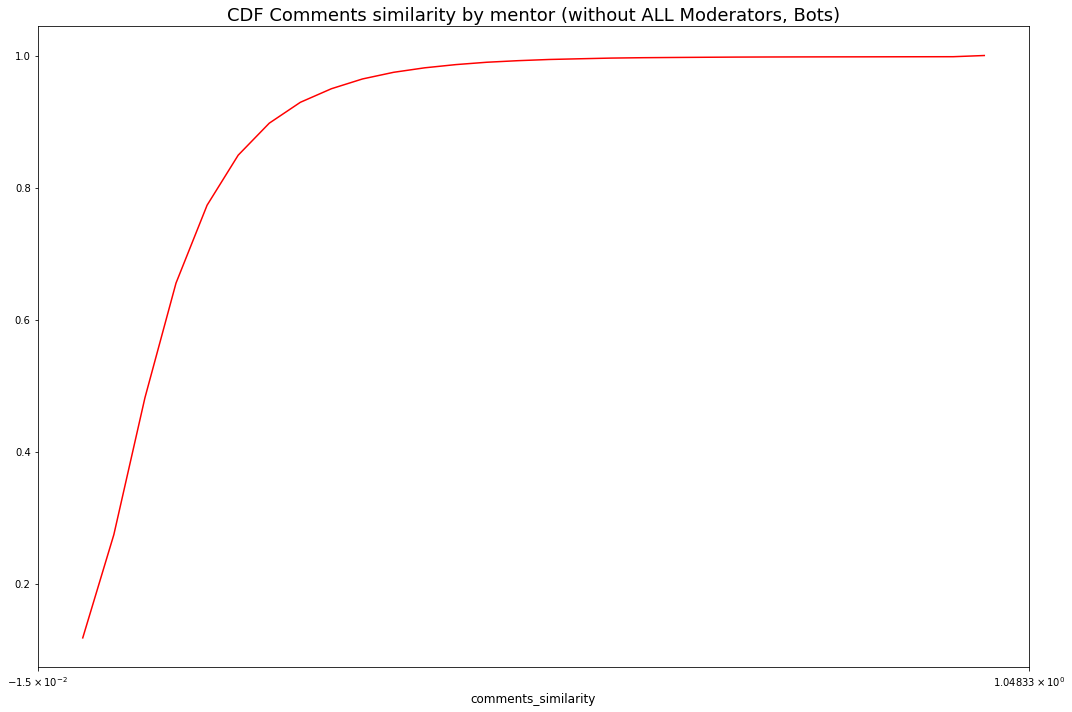

In [73]:
np_result5 = np.array(result_df2['comments_similarity'].tolist())
draw_cdf(np_result5, 30, 'comments_similarity', "CDF Comments similarity by mentor (without ALL Moderators, Bots)", 'red')

In [74]:
sql3 = 'select * from mentor where is_valid = 1 and posts_similarity >= 0;'
result_df3 = select_query_result_to_df(sql3)
result_df3

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_valid,is_score_entropy,es_score_entropy,is_score_normalized_entropy,es_score_normalized_entropy
0,_________________UWU,2,2,1.50000,2.00000,0.08134809,0E-8,1,0.57938016,0E-8,None,None
1,_______woohoo,4,2,1.00000,2.00000,0.02432665,0.05403434,1,0E-8,0.94639463,None,None
2,_______ZERO,10,10,1.10000,2.20000,0.09195855,0.05160771,1,0.29590327,0.81734542,None,None
3,______V______,10,9,1.20000,2.30000,0.08272898,0.03894385,1,0.45548592,0.93723056,None,None
4,_____0_,2,2,1.00000,2.50000,0.07903821,0.03580134,1,0E-8,0.63092975,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
281613,ZzzZura,2,1,1.00000,1.50000,0.12417232,0E-8,1,None,None,None,None
281614,Zzzzz315,2,2,1.00000,2.50000,0.18895569,0E-8,1,None,None,None,None
281615,zzzzzima,2,2,2.00000,2.00000,0.13160075,0E-8,1,None,None,None,None
281616,zzzzzsleepyzzzzz,3,2,1.33333,2.00000,0.12200409,0.04416443,1,None,None,None,None


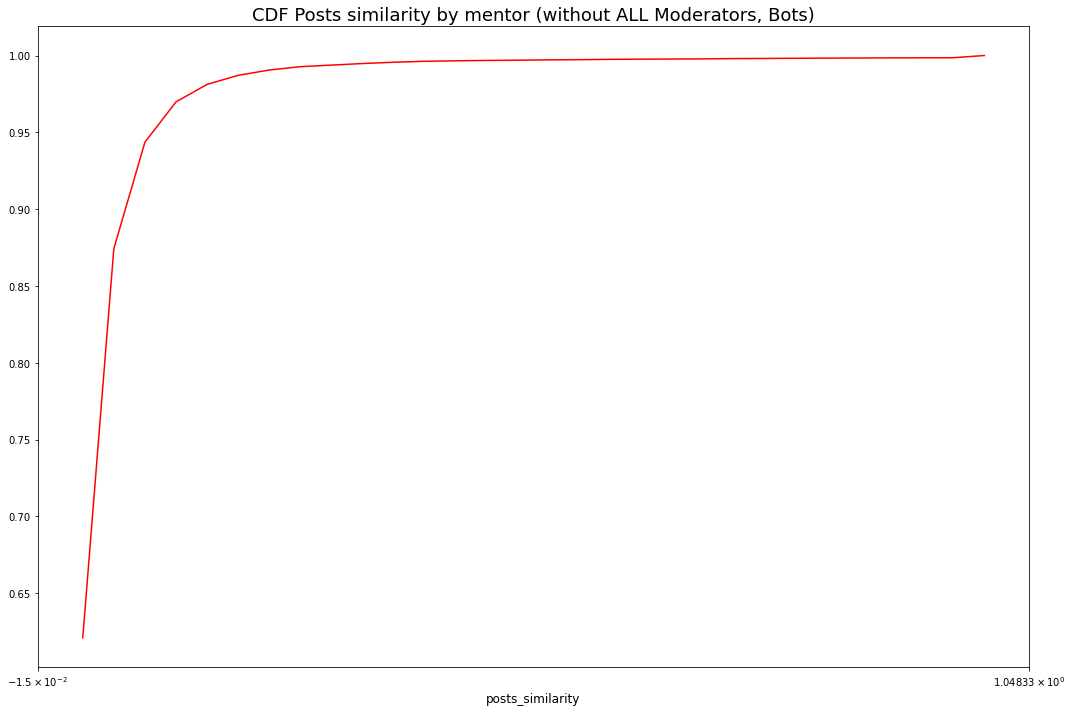

In [75]:
np_result6 = np.array(result_df3['posts_similarity'].tolist())
draw_cdf(np_result6, 30, 'posts_similarity', "CDF Posts similarity by mentor (without ALL Moderators, Bots)", 'red')